In [11]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
path = '/Users/jenniferhilibrand/conjoint_csv.csv'
df1 = pd.read_csv(path)
df2=df1.dropna()
df3=df2.drop(columns=['ID', 'Age','Laptop','Travel'])
scaler=StandardScaler()
df3 = scaler.fit_transform(df3)

In [3]:
pca = PCA(2)
 
#Transform the data
df_flattened = pca.fit_transform(df3)
 
df_flattened.shape

(118, 2)

In [4]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(df_flattened)
print(label)

[1 1 2 1 0 0 2 0 1 3 2 1 1 2 1 1 0 0 1 2 2 2 0 2 3 1 0 1 1 1 0 1 1 1 0 2 2
 1 1 0 0 1 1 1 1 3 0 1 1 0 3 0 0 0 0 2 0 0 2 0 3 0 1 1 0 1 2 0 0 2 1 2 0 0
 0 0 1 1 0 3 2 1 1 0 1 3 1 3 3 0 1 1 2 0 0 3 1 1 0 1 3 0 1 1 1 2 0 0 2 0 1
 1 0 2 0 0 0 0]


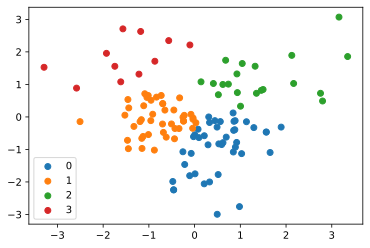

In [5]:
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(df_flattened[label == i , 0] , df_flattened[label == i , 1] , label = i)

plt.legend()
plt.show()

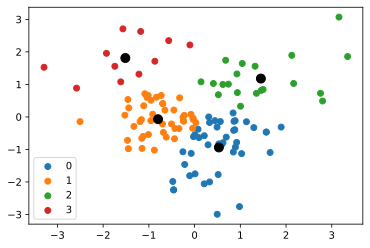

In [6]:

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df_flattened[label == i , 0] , df_flattened[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [7]:
kmeans.cluster_centers_

array([[ 0.53112749, -0.93967528],
       [-0.79933165, -0.0706733 ],
       [ 1.44977588,  1.17941448],
       [-1.5148552 ,  1.81157935]])

In [15]:
centers = pca.inverse_transform(kmeans.cluster_centers_)
#print(np.around(centers, 3))
np.around(scaler.inverse_transform(centers),3)

array([[5.71 , 2.472, 6.874, 5.728, 4.026],
       [5.849, 3.178, 5.703, 6.44 , 5.583],
       [3.736, 3.969, 6.05 , 4.207, 4.607],
       [4.947, 4.589, 4.224, 6.288, 7.281]])

In [18]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_flattened)
    kmeanModel.fit(df_flattened)
     #average SSE
    distortions.append(sum(np.min(cdist(df_flattened, kmeanModel.cluster_centers_,
                                     'euclidean'), axis=1)) / df_flattened.shape[0])
    #sum SSE
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_flattened, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_flattened.shape[0]
    mapping2[k] = kmeanModel.inertia_

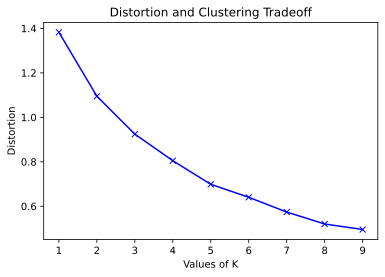

In [19]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Distortion and Clustering Tradeoff')
plt.show()

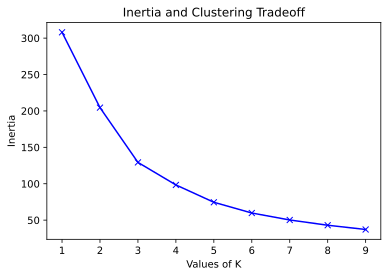

In [14]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia and Clustering Tradeoff')
plt.show()